# K-means clustering

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Load the datasets**

In [3]:
# Load data
train = pd.read_csv("datasets/train.csv")

test = pd.read_csv("datasets/test.csv")

**EDA**

In [4]:
# Uncomment lines to view output or use print() to view all


train.head()
# test.head()
# train.columns
# test.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Some statistics
train.describe()
# test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for null values
train.isna().head()
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
# Check for total null values per column
train.isna().sum()
# test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing data?**
<ul>
    <li>Remove rows with missing values</li>
    <li>Impute missing values with mean or median</li>
    <li>Do nothing</li>
</ul>

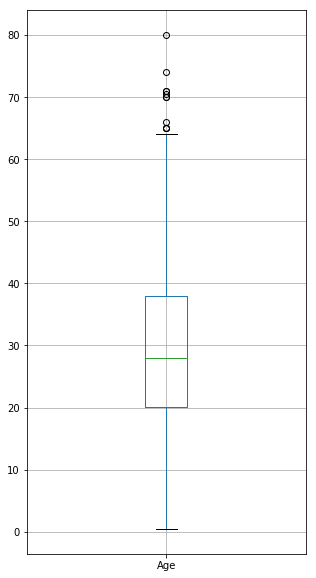

In [8]:
# Mean vs Median,a boxplot can be used to visualize the outliers
bp = train.boxplot("Age", figsize=(5,10))

**Impute missing values with mean**

In [9]:

# Fill in missing values
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [10]:
# Check for null values again
train.isna().sum()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Further data analysis
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


**Plot  data**

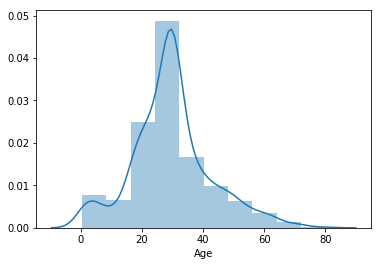

In [13]:
# Plot some of the data
# Uncomment to view output
# g = sns.FacetGrid(train, col='Survived', size=4,aspect=2)
# g.map(plt.hist, 'Age', bins=10)

# Some more plotting
# grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=4, aspect=2)
# grid.map(plt.hist, 'Age', alpha=.5, bins=10)
# grid.add_legend();

# Distribution plot age
sns.distplot(train['Age'], bins=10)

# Count plot for Sex
# sns.countplot("Sex", data=train)
# train[['Sex', 'Name']].groupby('Sex').count()

# sns.countplot('Pclass',data=train)


**Selecting important features**

In [22]:
# NOTE: Feature engineering is a vast topic which is not discussed for this presentation
train = train.drop(['Name','Ticket', 'Cabin','Embarked','Survived'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

**Encode the Data**

In [15]:
# Encoding categorical columns whose text data
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

**Scaling the Data( Scaling Vs Normalization)**<br>
*Normalization deals with reshaping data while scaling converts data to the same scale*<br>
*This is important when dealing with algorithms that rely on distance measures*

In [16]:
# We use the min-max scaling function
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

c:\users\jeremy\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**Define helper functions**

In [17]:
"""This function helps to get the numpy array indices of points assigned to a given cluster """
def get_predicted_label_indices(predicted_label_list, label):
    return np.where(predicted_label_list==label)

In [18]:
"""This function claculates the sum of squared errors for each cluster"""
def get_sum_of_squares_per_cluster(cluster_points, cluster_centroid):
    sse = 0
    for c in cluster_points:
#         print(c)
        sse+= (cluster_points-cluster_centroid)**2
    return sse.sum()

**Fitting our model**

In [20]:
"""We shall run the model for different values of K
   and calculate the sum of squared errors (SSE). We then plot
   the SSE against K to implement the elbow method 
   and this helps us to identify the optimum number of clusters.
"""
# Below is a complete list of sklearn K-means clustering model parameters
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
#     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
#     random_state=None, tol=0.0001, verbose=0)

K= 15
sse_K_list = []
ks = [i for i in range(1,K+1)]

for i in range(1, k+1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(train_scaled)
    
    
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(train_scaled)
    total_sse_per_K = 0
    for n in range(0,i):
        pred_cluster_indices = get_predicted_label_indices(pred_clusters,n)
        points_per_cluster = train_scaled[pred_cluster_indices]
        sse_per_cluster = get_sum_of_squares_per_cluster(points_per_cluster, centroids[n])
        total_sse_per_K+= sse_per_cluster
    
    sse_K_list.append(total_sse_per_K)    

**Plotting SSE against K (Elbow Method)**

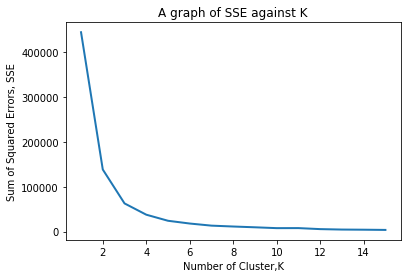

In [21]:

plt.plot(ks, sse_K_list, linewidth=2, markersize=12)
plt.xlabel('Number of Cluster,K')
plt.ylabel('Sum of Squared Errors, SSE')
plt.title('A graph of SSE against K')
plt.show()

*The optimum K value is about 5*

**Predicting clusters for the test set**

In [23]:
# SCale the test data
test_scaled = scaler.fit_transform(test)
# print(test_scaled)


kmeans = KMeans(n_clusters = 5)
kmeans.fit(train_scaled)
    
    
centroids = kmeans.cluster_centers_
pred_clusters = kmeans.predict(test_scaled)

c:\users\jeremy\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
# View clusters to which test data has been assigned
pred_clusters

array([1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 3, 1, 3, 3, 1, 1, 2, 2, 0, 1,
       3, 0, 3, 1, 3, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 3,
       3, 1, 0, 1, 3, 2, 0, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 0, 3,
       2, 0, 0, 3, 2, 1, 2, 0, 3, 0, 1, 3, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 3, 1, 1, 2, 0, 3, 3, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 1, 2,
       1, 1, 3, 2, 0, 2, 2, 1, 3, 1, 1, 2, 0, 1, 3, 2, 1, 1, 1, 1, 1, 3,
       3, 0, 3, 3, 1, 0, 3, 1, 3, 1, 3, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 3, 4, 4, 4, 1, 3, 2, 0, 2, 0, 3, 4,
       3, 4, 3, 4, 3, 2, 4, 2, 4, 4, 4, 3, 4, 4, 0, 4, 0, 4, 3, 3, 3, 3,
       0, 4, 4, 0, 3, 4, 3, 2, 3, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2,
       4, 4, 0, 4, 2, 4, 0, 4, 3, 2, 4, 3, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 0, 4, 4, 0, 2, 4, 0, 4, 4, 3, 4, 0, 4, 4,